In [1]:
from neo4j import GraphDatabase
from openai import OpenAI
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
import mysql.connector
import json
from collections import Counter
import os
import re
from dotenv import load_dotenv
load_dotenv()

True

,fatty,mild,faint,yeast,bread,baked,slightly_waxy,bitter,sweet,herbal,green,fennel
0,0.569537,0.334838,0.0,0.277696,0.277696,0.277696,0.0,0.166366,0.058056,0.029518,0.029518,0.029518


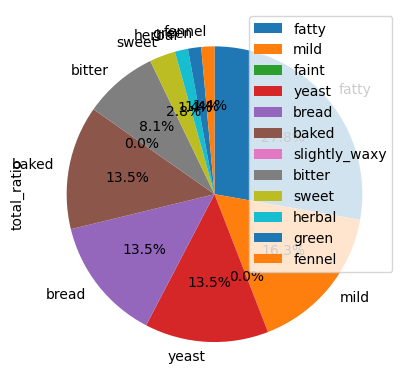

In [2]:
# サンプルデータ
import pandas as pd

data = {
    "aroma_id": [
        "fatty", "mild", "faint", "yeast", "bread", "baked", 
        "slightly_waxy", "bitter", "sweet", "herbal", "green", "fennel"
    ],
    "total_ratio": [
        0.569537, 0.334838, 0, 0.277696, 0.277696, 
        0.277696, 0, 0.166366, 0.058056, 0.029518, 0.029518, 0.029518
    ]
}
df = pd.DataFrame(data)
df.plot.pie(y="total_ratio", labels=df["aroma_id"], autopct="%1.1f%%", startangle=90, counterclock=False)

# aroma_id をカラム名に、total_ratio を値としたワンホットエンコーディング形式に変換
one_hot_df = pd.DataFrame({row["aroma_id"]: row["total_ratio"] for _, row in df.iterrows()}, index=[0])

# 結果を確認
one_hot_df

In [3]:
print(one_hot_df.values)

[[0.569537 0.334838 0.       0.277696 0.277696 0.277696 0.       0.166366
  0.058056 0.029518 0.029518 0.029518]]


In [6]:
import cv2
import numpy as np

# 画像を読み込む（グレースケール）
image = cv2.imread("../datas/cat_example1.png", cv2.IMREAD_GRAYSCALE)

# 画像をベクトル化（1次元配列に変換）
vector = image.flatten()

# ベクトルの形状を確認
print("Original Image Shape:", image.shape)  # (高さ, 幅)
print("Flattened Vector Shape:", vector.shape)  # (高さ*幅,)

# HOG特徴量を計算
hog = cv2.HOGDescriptor()
hog_features = hog.compute(image)

# 特徴量の形状を確認
print("HOG Features Shape:", hog_features.shape)  # 固定長

Original Image Shape: (1903, 3032)
Flattened Vector Shape: (5769896,)
HOG Features Shape: (312167520,)
